In [2]:
%pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 544.7 kB/s eta 0:03:04
   ---------------------------------------- 0.4/99.8 MB 2.6 MB/s eta 0:00:38
   ---------------------------------------- 0.9/99.8 MB 4.2 MB/s eta 0:00:24
    --------------------------------------- 1.3/99.8 MB 5.4 MB/s eta 0:00:19
    --------------------------------------- 1.6/99.8 MB 6.1 MB/s eta 0:00:17
   - -------------------------------------- 2.6/99.8 MB 7.6 MB/s eta 0:00:13
   - -------------------------------------- 3.2/99.8 MB 8.1 MB/s eta 0:00:12
   - -------------------------------------- 3.8/99.8 MB 8.6 MB/s eta 0:00:12
   - -------------------------------------- 4.4/99.8 MB 9.1 MB/s eta 0:00:11
   -- ------------------------------------- 5.1/99.8 MB 9.6 MB/s eta 0:00:10
   -- ------------

In [3]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
import numpy as np

### Loading the data

In [4]:
loan_df = pd.read_csv('C:\\UChicago\\Quarter_2\\DataMining\\Assignment_3_24\\Assignment_3\\Loan_Prediction\\Data for Cleaning & Modeling.csv')

C:\Users\arush\AppData\Local\Temp\ipykernel_24552\1870560592.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df = pd.read_csv('C:\\UChicago\\Quarter_2\\DataMining\\Assignment_3_24\\Assignment_3\\Loan_Prediction\\Data for Cleaning & Modeling.csv')


### Basic EDA and data cleaning

In [5]:
loan_df.shape

(400000, 32)

In [6]:
loan_df.head(4)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,...,Feb-94,0.0,NaN,NaN,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,...,Oct-00,0.0,NaN,NaN,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,57167.0,137225.0,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,...,Jun-00,0.0,41.0,NaN,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,57245.0,138150.0,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,...,Jan-85,0.0,64.0,NaN,5.0,0.0,2584.0,40.40%,31.0,f


In [7]:


short_headers = [
    "Interest_Rate", "Loan_ID", "Borrower_ID", "Loan_Amount_Req", "Loan_Amount_Funded",
    "Investor_Funded", "Num_of_Payments", "Loan_Grade", "Loan_Subgrade", "Employer",
    "Years_Employed", "Home_Ownership", "Annual_Income", "Income_Verified", "Loan_Issued_Date",
    "Loan_Reason", "Loan_Category", "Loan_Title", "Zip_Code", "State",
    "Debt_to_Income_Ratio", "Credit_Delinquencies_2yrs", "Earliest_Credit_Open_Date", 
    "Inquiries_Last_6Mths", "Months_Since_Last_Delinq", "Months_Since_Last_Public_Record", 
    "Open_Credit_Lines", "Derogatory_Public_Records", "Total_Revolving_Balance", 
    "Revolving_Utilization_Rate", "Total_Credit_Lines", "Initial_Listing_Status"
]

loan_df.columns = list(map(lambda x: x.lower(), short_headers))

In [8]:
loan_df.isnull().sum() / loan_df.shape[0] * 100 

interest_rate                      15.25250
loan_id                             0.00025
borrower_id                         0.00025
loan_amount_req                     0.00025
loan_amount_funded                  0.00025
investor_funded                     0.00025
num_of_payments                     0.00025
loan_grade                         15.31750
loan_subgrade                      15.31750
employer                            5.99650
years_employed                      4.38450
home_ownership                     15.34025
annual_income                      15.25700
income_verified                     0.00025
loan_issued_date                    0.00025
loan_reason                        69.11050
loan_category                       0.00025
loan_title                          0.00500
zip_code                            0.00025
state                               0.00025
debt_to_income_ratio                0.00025
credit_delinquencies_2yrs           0.00025
earliest_credit_open_date       

In [9]:
#Dropping cols which are less important or have too many missing values
dropping_cols = ['loan_reason', 'months_since_last_delinq', 'months_since_last_public_record', 'loan_id', 'borrower_id', ]
loan_df.drop(columns = dropping_cols, inplace=True, axis = 1)

In [10]:
loan_df.head()

,interest_rate,loan_amount_req,loan_amount_funded,investor_funded,num_of_payments,loan_grade,loan_subgrade,employer,years_employed,home_ownership,...,debt_to_income_ratio,credit_delinquencies_2yrs,earliest_credit_open_date,inquiries_last_6mths,open_credit_lines,derogatory_public_records,total_revolving_balance,revolving_utilization_rate,total_credit_lines,initial_listing_status
0,11.89%,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,< 1 year,RENT,...,19.48,0.0,Feb-94,0.0,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,"$7,000","$7,000",$673,36 months,B,B5,CNN,< 1 year,RENT,...,14.29,0.0,Oct-00,0.0,7.0,0.0,33623.0,76.70%,7.0,f
2,16.99%,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,1 year,RENT,...,10.50,0.0,Jun-00,0.0,10.0,0.0,19878.0,66.30%,17.0,f
3,13.11%,"$1,200","$1,200","$1,200",36 months,C,C2,city of beaumont texas,10+ years,OWN,...,5.47,0.0,Jan-85,0.0,5.0,0.0,2584.0,40.40%,31.0,f
4,13.57%,"$10,800","$10,800","$10,692",36 months,C,C3,State Farm Insurance,6 years,RENT,...,11.63,0.0,Dec-96,1.0,14.0,0.0,3511.0,25.60%,40.0,f


In [11]:
loan_df.dtypes

interest_rate                  object
loan_amount_req                object
loan_amount_funded             object
investor_funded                object
num_of_payments                object
loan_grade                     object
loan_subgrade                  object
employer                       object
years_employed                 object
home_ownership                 object
annual_income                 float64
income_verified                object
loan_issued_date               object
loan_category                  object
loan_title                     object
zip_code                       object
state                          object
debt_to_income_ratio          float64
credit_delinquencies_2yrs     float64
earliest_credit_open_date      object
inquiries_last_6mths          float64
open_credit_lines             float64
derogatory_public_records     float64
total_revolving_balance       float64
revolving_utilization_rate     object
total_credit_lines            float64
initial_list

In [12]:
loan_df.isna().sum()

interest_rate                 61010
loan_amount_req                   1
loan_amount_funded                1
investor_funded                   1
num_of_payments                   1
loan_grade                    61270
loan_subgrade                 61270
employer                      23986
years_employed                17538
home_ownership                61361
annual_income                 61028
income_verified                   1
loan_issued_date                  1
loan_category                     1
loan_title                       20
zip_code                          1
state                             1
debt_to_income_ratio              1
credit_delinquencies_2yrs         1
earliest_credit_open_date         1
inquiries_last_6mths              1
open_credit_lines                 1
derogatory_public_records         1
total_revolving_balance           1
revolving_utilization_rate      267
total_credit_lines                1
initial_listing_status            1
dtype: int64

In [13]:
replace_list = ['interest_rate','revolving_utilization_rate']
loan_df[replace_list] = loan_df[replace_list].replace('%', '', regex=True).astype(float)

In [14]:
loan_df.head(3)

,interest_rate,loan_amount_req,loan_amount_funded,investor_funded,num_of_payments,loan_grade,loan_subgrade,employer,years_employed,home_ownership,...,debt_to_income_ratio,credit_delinquencies_2yrs,earliest_credit_open_date,inquiries_last_6mths,open_credit_lines,derogatory_public_records,total_revolving_balance,revolving_utilization_rate,total_credit_lines,initial_listing_status
0,11.89,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,< 1 year,RENT,...,19.48,0.0,Feb-94,0.0,10.0,0.0,28854.0,52.1,42.0,f
1,10.71,"$7,000","$7,000",$673,36 months,B,B5,CNN,< 1 year,RENT,...,14.29,0.0,Oct-00,0.0,7.0,0.0,33623.0,76.7,7.0,f
2,16.99,"$25,000","$25,000","$24,725",36 months,D,D3,Web Programmer,1 year,RENT,...,10.50,0.0,Jun-00,0.0,10.0,0.0,19878.0,66.3,17.0,f


In [15]:
dollar_replace = ['loan_amount_req', 'loan_amount_funded', 'investor_funded']

# Remove dollar sign and comma from the specified columns
loan_df[dollar_replace] = loan_df[dollar_replace].replace(r'[$,]', '', regex=True)

# Convert the columns to float
loan_df[dollar_replace] = loan_df[dollar_replace].astype(float)


In [16]:
# dollar_replace = ['loan_amount_req', 'loan_amount_funded','investor_funded']
# loan_df[dollar_replace] = loan_df[dollar_replace].replace(r'$', '', regex=True ).astype(float)
# loan_df[dollar_replace] = loan_df[dollar_replace].replace(r',', '', regex=True).astype(float)


In [17]:
loan_df.head(3)

,interest_rate,loan_amount_req,loan_amount_funded,investor_funded,num_of_payments,loan_grade,loan_subgrade,employer,years_employed,home_ownership,...,debt_to_income_ratio,credit_delinquencies_2yrs,earliest_credit_open_date,inquiries_last_6mths,open_credit_lines,derogatory_public_records,total_revolving_balance,revolving_utilization_rate,total_credit_lines,initial_listing_status
0,11.89,25000.0,25000.0,19080.0,36 months,B,B4,NaN,< 1 year,RENT,...,19.48,0.0,Feb-94,0.0,10.0,0.0,28854.0,52.1,42.0,f
1,10.71,7000.0,7000.0,673.0,36 months,B,B5,CNN,< 1 year,RENT,...,14.29,0.0,Oct-00,0.0,7.0,0.0,33623.0,76.7,7.0,f
2,16.99,25000.0,25000.0,24725.0,36 months,D,D3,Web Programmer,1 year,RENT,...,10.50,0.0,Jun-00,0.0,10.0,0.0,19878.0,66.3,17.0,f


In [18]:
loan_df.dtypes

interest_rate                 float64
loan_amount_req               float64
loan_amount_funded            float64
investor_funded               float64
num_of_payments                object
loan_grade                     object
loan_subgrade                  object
employer                       object
years_employed                 object
home_ownership                 object
annual_income                 float64
income_verified                object
loan_issued_date               object
loan_category                  object
loan_title                     object
zip_code                       object
state                          object
debt_to_income_ratio          float64
credit_delinquencies_2yrs     float64
earliest_credit_open_date      object
inquiries_last_6mths          float64
open_credit_lines             float64
derogatory_public_records     float64
total_revolving_balance       float64
revolving_utilization_rate    float64
total_credit_lines            float64
initial_list

In [19]:
loan_df['num_of_payments'].unique()

array([' 36 months', ' 60 months', nan], dtype=object)

In [20]:
loan_df.dropna(subset='interest_rate' , inplace=True)
loan_df.dropna(subset='num_of_payments' , inplace=True)
loan_df.dropna(subset='revolving_utilization_rate' , inplace=True)
loan_df.dropna(subset='loan_title' , inplace=True)


In [21]:
loan_df.loc[loan_df['loan_grade'].isnull(), ['loan_grade']] = loan_df['loan_grade'].mode(dropna=True).values[0]
loan_df['loan_subgrade'] = loan_df.groupby('loan_grade')['loan_subgrade'].transform(lambda x: x.fillna(x.mode().iloc[0]))
loan_df.loc[loan_df['years_employed'].isnull(), ['years_employed']] = loan_df['years_employed'].mode(dropna=True).values[0]
loan_df.loc[loan_df['employer'].isnull(), ['employer']] = loan_df['employer'].mode(dropna=True).values[0]
loan_df.loc[loan_df['home_ownership'].isnull(), ['home_ownership']] = loan_df['home_ownership'].mode(dropna=True).values[0]
loan_df.loc[loan_df['annual_income'].isnull(), ['annual_income']] = loan_df['annual_income'].mean(skipna=True)

In [74]:
loan_df.head()

,interest_rate,loan_amount_req,loan_amount_funded,investor_funded,num_of_payments,loan_grade,loan_subgrade,employer,years_employed,home_ownership,...,debt_to_income_ratio,credit_delinquencies_2yrs,earliest_credit_open_date,inquiries_last_6mths,open_credit_lines,derogatory_public_records,total_revolving_balance,revolving_utilization_rate,total_credit_lines,initial_listing_status
0,11.89,25000.0,25000.0,19080.0,0.0,1.0,8.0,123768.0,10.0,5.0,...,19.48,0.0,201.0,0.0,10.0,0.0,28854.0,52.1,42.0,0.0
1,10.71,7000.0,7000.0,673.0,0.0,1.0,9.0,19610.0,10.0,5.0,...,14.29,0.0,543.0,0.0,7.0,0.0,33623.0,76.7,7.0,0.0
2,16.99,25000.0,25000.0,24725.0,0.0,3.0,17.0,137058.0,0.0,5.0,...,10.50,0.0,322.0,0.0,10.0,0.0,19878.0,66.3,17.0,0.0
3,13.11,1200.0,1200.0,1200.0,0.0,2.0,11.0,143839.0,1.0,4.0,...,5.47,0.0,254.0,0.0,5.0,0.0,2584.0,40.4,31.0,0.0
4,13.57,10800.0,10800.0,10692.0,0.0,2.0,12.0,119090.0,6.0,5.0,...,11.63,0.0,154.0,1.0,14.0,0.0,3511.0,25.6,40.0,0.0


<Axes: >

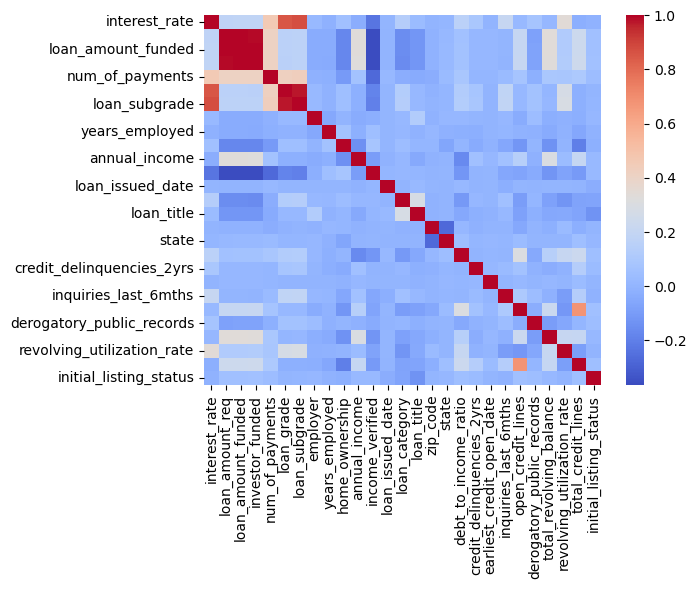

In [23]:
categorical = [x for x in loan_df.columns if loan_df[x].dtype == 'O']

oe = OrdinalEncoder()

loan_df[categorical] =  oe.fit_transform(loan_df[categorical])
sns.heatmap(loan_df.corr(), cmap='coolwarm')

### Splitting into train and test

In [24]:
x_train, x_val, y_train, y_val = train_test_split(loan_df.drop('interest_rate', axis=1), loan_df['interest_rate'], test_size=0.1, shuffle=True)

### Running the Gradient Boosting Machine

In [25]:
gbm_model = GradientBoostingRegressor()

# Fit the model on the training data
gbm_model.fit(x_train, y_train)

# Predict on the validation data
y_val_pred = gbm_model.predict(x_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_val_pred)
print("Root Mean Squared Error on Validation Data:", np.sqrt(mse))

Root Mean Squared Error on Validation Data: 1.5728302142970638


In [26]:
# #svm_model = SVR()
# svm_model = SVR(C=1.0, kernel='rbf', gamma='scale')
# # Fit the model on the training data
# svm_model.fit(x_train, y_train)

# # Predict on the validation data
# y_val_pred = svm_model.predict(x_val)

# # Evaluate the model
# mse = mean_squared_error(y_val, y_val_pred)
# print("Root Mean Squared Error on Validation Data:", np.sqrt(mse))

### Running Random Forest

In [27]:
rf_model = RandomForestRegressor(n_jobs=-1)

# Fit the model on the training data
rf_model.fit(x_train, y_train)

# Predict on the validation data
y_val_pred = rf_model.predict(x_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_val_pred)
print("Root Mean Squared Error on Validation Data:", np.sqrt(mse))

Root Mean Squared Error on Validation Data: 1.3411861638460574


### Running SGD

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor


scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)

sgd_model = SGDRegressor()

# Fit the model on the scaled training data
sgd_model.fit(x_train_scaled, y_train)

# Predict on the scaled validation data
y_val_pred = sgd_model.predict(x_val_scaled)

# Evaluate the model
mse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print("Root Mean Squared Error on Validation Data:", mse)

Root Mean Squared Error on Validation Data: 1.9571691020800521


### Running XGBoost

In [29]:
xgb_model = xgb.XGBRegressor()

# Convert data to DMatrix format (optimized for XGBoost)
dtrain = xgb.DMatrix(x_train, label=y_train)
dval = xgb.DMatrix(x_val, label=y_val)

# Set parameters for XGBoost model training
params = {
    'objective': 'reg:squarederror',  # Specify regression as the objective
    'eval_metric': 'rmse'  # Use RMSE as the evaluation metric
}

# Train the model
xgb_model = xgb.train(params, dtrain)

# Predict on the validation data
y_val_pred = xgb_model.predict(dval)

# Evaluate the model
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error on Validation Data:", rmse)

Root Mean Squared Error on Validation Data: 1.5277293598157418


### Running Random Forset on the whole data

In [40]:
x_combined = pd.concat([x_train, x_val], axis=0)
y_combined = pd.concat([y_train, y_val], axis=0)

# Initialize the RandomForestRegressor model
rf_model = RandomForestRegressor(n_jobs=-1)

# Fit the model on the entire dataset
rf_model.fit(x_combined, y_combined)

# Predict on the entire dataset
y_pred = rf_model.predict(x_combined)

# Evaluate the model
mse = mean_squared_error(y_combined, y_pred)
print("Root Mean Squared Error on Entire Dataset:", np.sqrt(mse))

Root Mean Squared Error on Entire Dataset: 0.5026480230933579


In [43]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error

r2 = r2_score(y_val, y_val_pred)
explained_variance = explained_variance_score(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)

print("R-squared (R2) Score:", r2)
print("Explained Variance Score:", explained_variance)
print("Mean Absolute Error (MAE):", mae)


feature_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': rf_model.feature_importances_})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the DataFrame
print("Feature Importances:")
feature_importance_df

# # Print the feature importances
# print("\nFeature Importances:")
# for feature, importance in zip(x_train.columns, rf_model.feature_importances_):
#     print(f"{feature}: {importance}")

R-squared (R2) Score: 0.8775555521476014
Explained Variance Score: 0.8775565322941443
Mean Absolute Error (MAE): 0.8808313552625592
Feature Importances:


,Feature,Importance
5,loan_subgrade,0.818090
11,loan_issued_date,0.024183
23,revolving_utilization_rate,0.021099
3,num_of_payments,0.017847
22,total_revolving_balance,0.010848
16,debt_to_income_ratio,0.008705
9,annual_income,0.008269
19,inquiries_last_6mths,0.008218
13,loan_title,0.007638
6,employer,0.006923


### Handling holdout data

In [63]:
df = pd.read_csv('C:\\UChicago\\Quarter_2\\DataMining\\Assignment_3_24\\Assignment_3\\Loan_Prediction\\Holdout for Testing.csv')

In [64]:
short_headers = [
    "Interest_Rate", "Loan_ID", "Borrower_ID", "Loan_Amount_Req", "Loan_Amount_Funded",
    "Investor_Funded", "Num_of_Payments", "Loan_Grade", "Loan_Subgrade", "Employer",
    "Years_Employed", "Home_Ownership", "Annual_Income", "Income_Verified", "Loan_Issued_Date",
    "Loan_Reason", "Loan_Category", "Loan_Title", "Zip_Code", "State",
    "Debt_to_Income_Ratio", "Credit_Delinquencies_2yrs", "Earliest_Credit_Open_Date", 
    "Inquiries_Last_6Mths", "Months_Since_Last_Delinq", "Months_Since_Last_Public_Record", 
    "Open_Credit_Lines", "Derogatory_Public_Records", "Total_Revolving_Balance", 
    "Revolving_Utilization_Rate", "Total_Credit_Lines", "Initial_Listing_Status"
]

df.columns = list(map(lambda x: x.lower(), short_headers))

In [65]:
df.isnull().sum() / df.shape[0] * 100 

interest_rate                      100.00000
loan_id                              0.00000
borrower_id                          0.00000
loan_amount_req                      0.00000
loan_amount_funded                   0.00000
investor_funded                      0.00000
num_of_payments                      0.00000
loan_grade                           0.00000
loan_subgrade                        0.00000
employer                             5.49250
years_employed                       5.47750
home_ownership                       0.00000
annual_income                        0.00000
income_verified                      0.00000
loan_issued_date                     0.00000
loan_reason                         99.98125
loan_category                        0.00000
loan_title                           0.00000
zip_code                             0.00000
state                                0.00000
debt_to_income_ratio                 0.00000
credit_delinquencies_2yrs            0.00000
earliest_c

In [66]:
dropping_cols = ['loan_reason', 'months_since_last_delinq', 'months_since_last_public_record', 'loan_id', 'borrower_id','interest_rate' ]
df.drop(columns = dropping_cols, inplace=True, axis = 1)

In [67]:
replace_list = ['revolving_utilization_rate']
df[replace_list] = df[replace_list].replace('%', '', regex=True).astype(float)

In [68]:
dollar_replace = ['loan_amount_req', 'loan_amount_funded', 'investor_funded']

# Remove dollar sign and comma from the specified columns
df[dollar_replace] = df[dollar_replace].replace(r'[$,]', '', regex=True)

# Convert the columns to float
df[dollar_replace] = df[dollar_replace].astype(float)

In [52]:
df.dropna(subset='num_of_payments' , inplace=True)
df.dropna(subset='revolving_utilization_rate' , inplace=True)
df.dropna(subset='loan_title' , inplace=True)

In [69]:
df.loc[df['years_employed'].isnull(), 'years_employed'] = df['years_employed'].mode().values[0]
df.loc[df['employer'].isnull(), 'employer'] = df['employer'].mode().values[0]
df.loc[df['num_of_payments'].isnull(), 'num_of_payments'] = df['num_of_payments'].mode().values[0]


In [70]:
df.loc[df['revolving_utilization_rate'].isnull(), 'revolving_utilization_rate'] = df['revolving_utilization_rate'].mode().values[0]
df.loc[df['loan_title'].isnull(), 'loan_title'] = df['loan_title'].mode().values[0]


In [71]:
import pickle
with open('random_forest_model.pkl', 'wb') as rfmodel:
    pickle.dump(rf_model, rfmodel)

In [72]:
with open('random_forest_model.pkl', 'rb') as rfmodel:
    loaded_rf_model = pickle.load(rfmodel)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79970 entries, 0 to 79999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amount_req             79970 non-null  float64
 1   loan_amount_funded          79970 non-null  float64
 2   investor_funded             79970 non-null  float64
 3   num_of_payments             79970 non-null  object 
 4   loan_grade                  79970 non-null  object 
 5   loan_subgrade               79970 non-null  object 
 6   employer                    79970 non-null  object 
 7   years_employed              79970 non-null  object 
 8   home_ownership              79970 non-null  object 
 9   annual_income               79970 non-null  float64
 10  income_verified             79970 non-null  object 
 11  loan_issued_date            79970 non-null  object 
 12  loan_category               79970 non-null  object 
 13  loan_title                  79970 no

In [62]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338749 entries, 0 to 399999
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   interest_rate               338749 non-null  float64
 1   loan_amount_req             338749 non-null  float64
 2   loan_amount_funded          338749 non-null  float64
 3   investor_funded             338749 non-null  float64
 4   num_of_payments             338749 non-null  float64
 5   loan_grade                  338749 non-null  float64
 6   loan_subgrade               338749 non-null  float64
 7   employer                    338749 non-null  float64
 8   years_employed              338749 non-null  float64
 9   home_ownership              338749 non-null  float64
 10  annual_income               338749 non-null  float64
 11  income_verified             338749 non-null  float64
 12  loan_issued_date            338749 non-null  float64
 13  loan_category      

<Axes: >

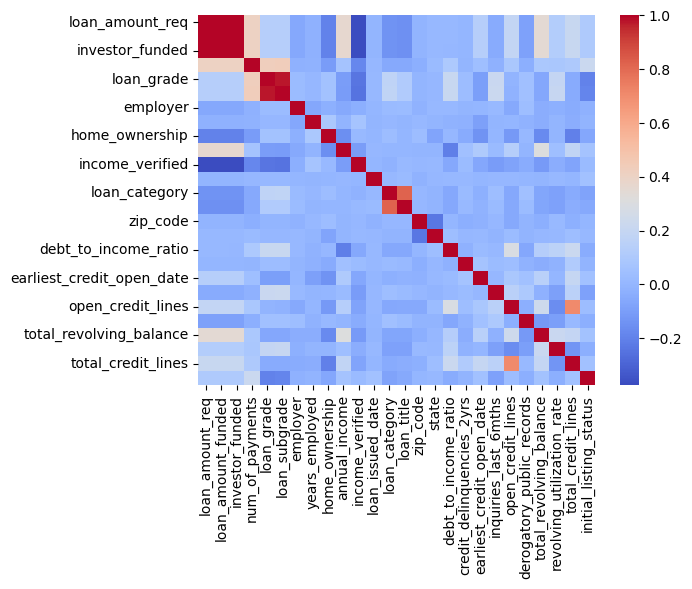

In [76]:
from sklearn.preprocessing import OrdinalEncoder

# Assuming categorical contains the list of categorical column names
categorical = [x for x in df.columns if df[x].dtype == 'O']

# Initialize OrdinalEncoder
oe = OrdinalEncoder()

# Fit and transform the categorical columns
df[categorical] = oe.fit_transform(df[categorical])

# Display the correlation heatmap
sns.heatmap(df.corr(), cmap='coolwarm')

In [77]:
prediction = loaded_rf_model.predict(df)

In [81]:
predictions_df = pd.DataFrame({'Prediction': prediction})

predictions_df.to_csv('C:\\UChicago\\Quarter_2\\DataMining\\Assignment3\\results_from_ArushiMakraria.csv', index=False)


### Final Model - Random Forest

Based on these metrics and feature importances, our Random Forest model is performing considerably well and effectively capturing the relationships between the features and the target variable. 

The R-squared score measures the proportion of the variance in the target variable (interest rate) that is explained by the independent variables (features) in my model. An R-squared score of 0.878 indicates that approximately 87.8% of the variance in the interest rates can be explained by the features included in my model.

The explained variance score also measures the proportion of variance in the target variable that is explained by the model. It is closely related to the R-squared score and provides a similar interpretation. The score of 0.878 indicates a high level of explanation of variance in the target variable by the model.

